In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## Learning rate p.2
def f(x):
    return x**2 -4*x +6

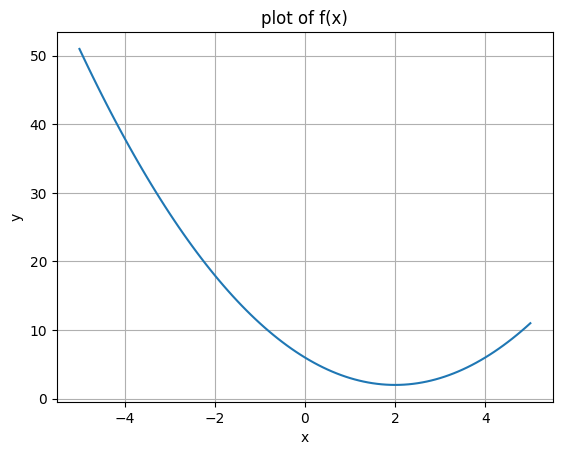

In [6]:
# total num of spot to draw line
NumberOfPoints = 101
x = np.linspace(-5.,5, NumberOfPoints)
# 2차식 f(x)의 새이름 fx
fx = f(x)
# -5~5 범위를 표현하는 표를 그릴거임. 점 101개 가지고
# 동시에 그려야 표랑 그래프랑 그리겠지?
# 표 x , 함수 fx
plt.plot(x,fx)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('plot of f(x)')
plt.show()

In [7]:
## Learning rate p.3

xid = np.argmin(fx)
# opt = optimal
xopt = x[xid]
xopt1 = x[0]
xopt2 = x[1]
xopt3 = x[-1]
xopt4 = len(x)
# print(xid)
# print(xopt, f(xopt))
print("xopt:", xopt, "Type:", type(xopt))
print("f(xopt):", f(xopt), "Type:", type(f(xopt)))
print(xopt1,xopt2,xopt3)
print(xopt4)

xopt: 2.0 Type: <class 'numpy.float64'>
f(xopt): 2.0 Type: <class 'numpy.float64'>
-5.0 -4.9 5.0
101


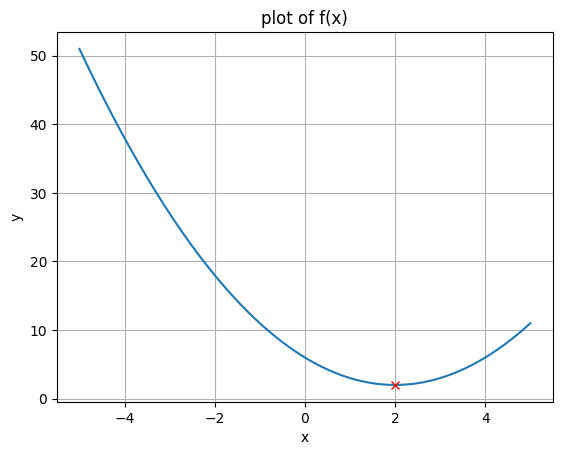

In [ ]:
plt.plot(x,fx)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('plot of f(x)')

# 그 위치에 x표시를 할꺼고 그 x 의 색상은 붉다
plt.plot(xopt, f(xopt), 'xr')
# plt.plot('xr')
plt.show()

In [11]:
def f(x):
    return x**2 -4*x +6

In [10]:
def grad_fx(x):
    return 2*x -4 

In [9]:
def steepest_desecent(func, grad_func, x0, learning_rate=0.01, Maxlter=10, verbose=True ):
    paths = []
    for i in range(Maxlter):
        x1 = x0 - learning_rate * grad_func(x0)
        if verbose:
            print('{0:03d} : {1:4.3f} : {2:4.2E}'.format(i,x1,func(x1)))
        x0 = x1
        paths.append(x0)
    return(x0, func(x0), paths)

In [12]:
xopt, fopt, paths = steepest_desecent(f, grad_fx, 0.0, learning_rate=1.2)
# xopt = x[xid]

000 : 4.800 : 9.84E+00
001 : -1.920 : 1.74E+01
002 : 7.488 : 3.21E+01
003 : -5.683 : 6.10E+01
004 : 12.756 : 1.18E+02
005 : -13.059 : 2.29E+02
006 : 23.083 : 4.46E+02
007 : -27.516 : 8.73E+02
008 : 43.322 : 1.71E+03
009 : -55.851 : 3.35E+03


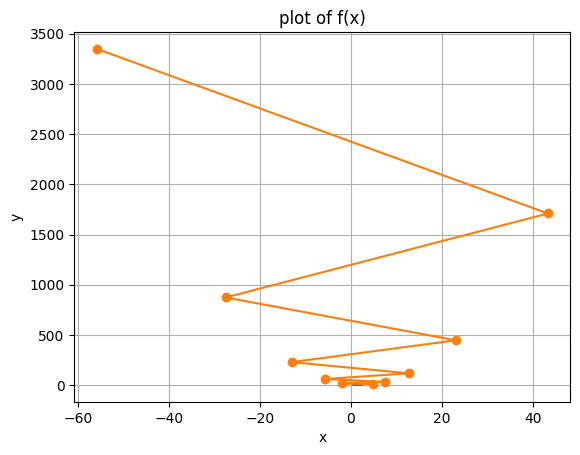

In [13]:
x = np.linspace(0.5, 2.5, 1000)
paths = np.array(paths)
plt.plot(x, f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
# plt.plot('xr')
plt.show()

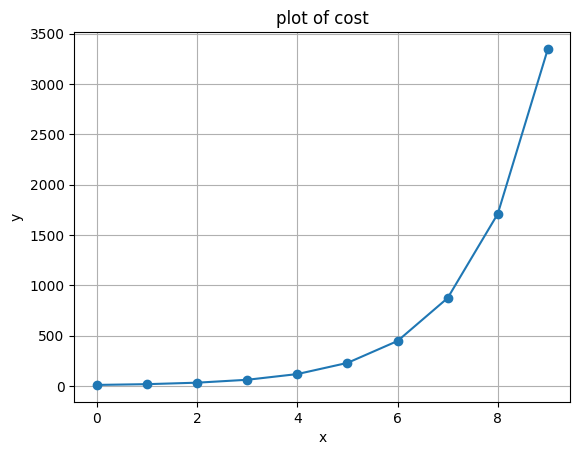

In [14]:
plt.plot(f(paths), 'o-')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('plot of cost')

plt.show()

In [32]:
xopt, fopt, paths = steepest_desecent(f, grad_fx, 1.0, learning_rate=1)

000 : 3.000 : 3.00E+00
001 : 1.000 : 3.00E+00
002 : 3.000 : 3.00E+00
003 : 1.000 : 3.00E+00
004 : 3.000 : 3.00E+00
005 : 1.000 : 3.00E+00
006 : 3.000 : 3.00E+00
007 : 1.000 : 3.00E+00
008 : 3.000 : 3.00E+00
009 : 1.000 : 3.00E+00


Text(0.5, 1.0, 'plot of f(x)')

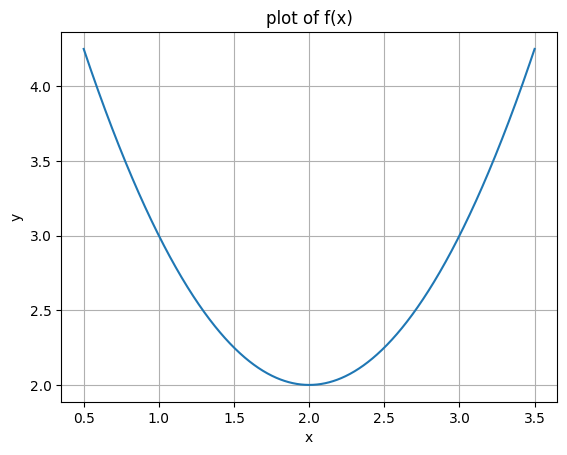

In [15]:
x = np.linspace(0.5, 3.5, 1000)
paths = np.array(paths)
plt.plot(x, f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('plot of f(x)')

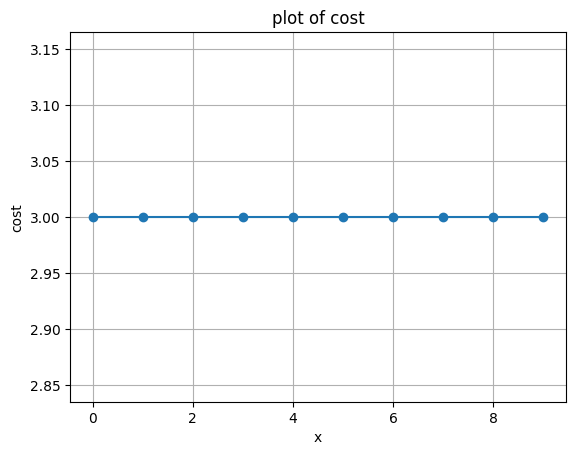

In [37]:
plt.plot(f(paths), 'o-')
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

In [1]:
from matplotlib.colors import LogNorm
from visualize import *

In [18]:
xmin, xmax, xsetp  = -4.0, 4.0, .25
ymin, ymax, ysetp  = -4.0, 4.0, .25

x, y = np.meshgrid(np.arange(xmin, xmax + xsetp, xsetp),
                    np.arange(ymin, ymax + ysetp, ysetp))

f = lambda x,y : (x-2)**2 + (y-2)**2
z = f(x,y)
minima = np.array([2., 2.])

f(*minima)

np.float64(0.0)

[2. 2.] [[2.]
 [2.]]


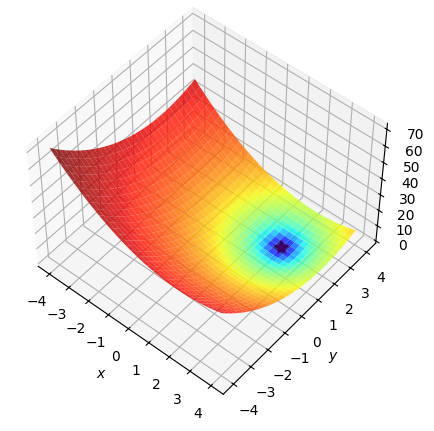

In [19]:
minima_ = minima.reshape(-1,1)
print(minima,minima_)
surf(f,x,y,minima=minima_)

In [20]:
grad_f_x = lambda x,y : 2 * (x-2)
grad_f_y = lambda x,y : 2 * (y-2)

/home/intel/workdir/visualize.py:27: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)


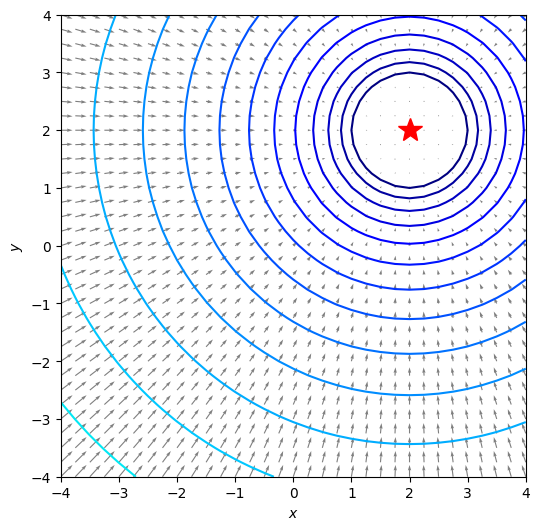

In [21]:
contour_with_quiver(f,x,y,grad_f_x,grad_f_y, minima=minima_)

In [25]:
def steepest_desecent_twod(func, gradx, grady, x0, Maxlter=10, learning_rate=0.25, verbose=True):
    paths = [x0]
    fval_paths = [f(x0[0], x0[1])]
    for i in range(Maxlter):
        grad = np.array([grad_f_x(*x0), grad_f_y(*x0)])
        x1 = x0 - learning_rate * grad
        fval = f(*x1)
        if verbose:
            print(i,x1,fval)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

In [26]:
x0 = np.array([-2., -2.])
xopt, fopt, paths, fval_paths = steepest_desecent_twod(f, grad_f_x, grad_f_y, x0)

0 [0. 0.] 8.0
1 [1. 1.] 2.0
2 [1.5 1.5] 0.5
3 [1.75 1.75] 0.125
4 [1.875 1.875] 0.03125
5 [1.9375 1.9375] 0.0078125
6 [1.96875 1.96875] 0.001953125
7 [1.984375 1.984375] 0.00048828125
8 [1.9921875 1.9921875] 0.0001220703125
9 [1.99609375 1.99609375] 3.0517578125e-05


/home/intel/workdir/visualize.py:58: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)


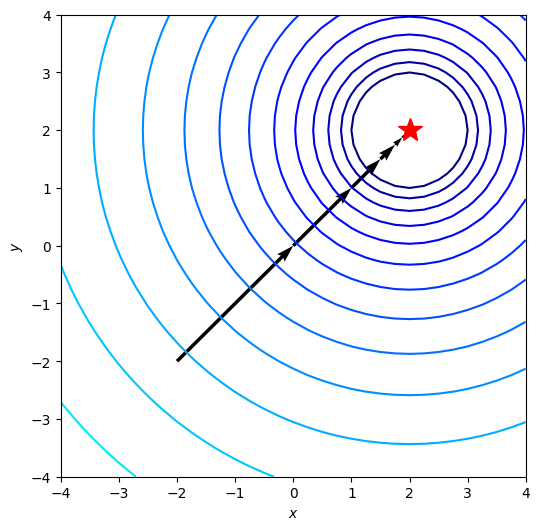

In [28]:
contour_with_path(f, x, y, paths, minima=np.array([[2],[2]]))

In [4]:
import numpy as np
import matplotlib.pylab as plt

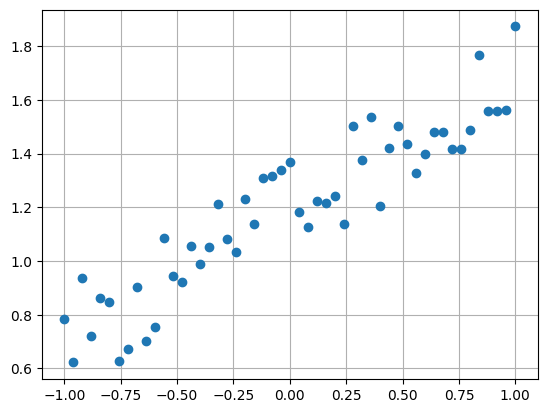

In [5]:
np.random.seed(320)
x_train = np.linspace(-1,1,51)
f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))
plt.plot(x_train,y_train, 'o')
plt.grid()
plt.show()

In [6]:
np.random.seed(303)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
x_train = x_train[shuffled_id]
y_train = y_train[shuffled_id]

In [7]:
def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * ( w[0] * x_set[i] +w[1] - y_set[i] ) **2
    return val / N

def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0 ])
    return val / N

def generate_batches(batch_size, features, labels):
    assert len(features) == len(labels)
    outout_batches = []

    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    
    return outout_batches

In [33]:
#GD vs Momentum
batch_size = 10
lr = 0.01
MaxEpochs = 51

alpha = .9

In [39]:
#GD
w0 = np.array([4.0, -1.0])
path_sgd = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        w1 = w0 - lr * grad
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.43799693 1.21638241] 0.007111813386801515
20 [0.43799693 1.21638241] 0.007111813386800047
30 [0.43799693 1.21638241] 0.007111813386800047
40 [0.43799693 1.21638241] 0.007111813386800047
50 [0.43799693 1.21638241] 0.007111813386800047


0 [ 4. -1.] 4.579314993864028
10 [0.83302959 1.20678435] 0.03003201597220386
20 [0.4684414 1.2013792] 0.006758172467077168
30 [0.46435817 1.19757988] 0.0067419444174559254
40 [0.46490866 1.19741605] 0.006741085572109452
50 [0.46493098 1.19741456] 0.006741066002074992


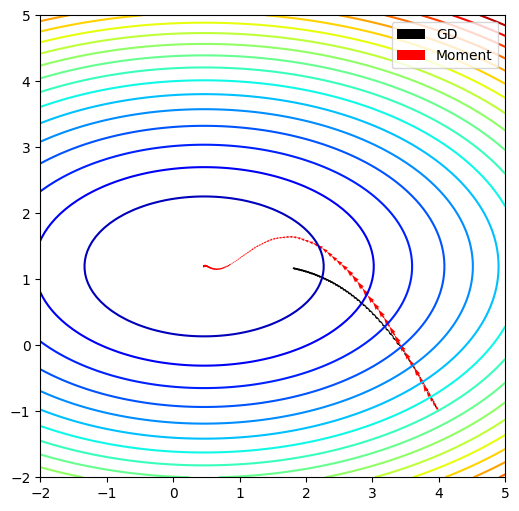

In [34]:
#Momentum
w0 = np.array([4.0, -1.0])
path_mm = []
velocity = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    if epoch % 10 ==0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_mm.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        velocity = alpha * velocity - lr * grad
        w1 = w0 + velocity
        w0 = w1

w0 = np.linspace(-2,5,101)
w1 = np.linspace(-2,5,101)
w0, w1 = np.meshgrid(w0, w1)
LOSSW = w0 * 0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i,j],w1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))

ax.contour(w0, w1, LOSSW, cmap=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()),20 ))

paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='k')

paths = path_mm
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['GD','Moment'])
plt.show()

In [38]:
#GD vs Adagrad
batch_size = 10
lr = 1.5
MaxEpochs = 51

epsilon = lr
delta = 1E-7

In [40]:
# Adagrad

w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_adagd = []

for epoch in range(MaxEpochs):
    if epoch % 10 ==0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adagd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)

        r= r + grad * grad
        delw = -epsilon / (delta + np.sqrt(r)) * grad
        w1 = w0 + delw
        w0 = w1



0 [ 4. -1.] 4.579314993864028
10 [0.45317168 1.1999705 ] 0.006782855900139488
20 [0.45321417 1.19996836] 0.006782642181875964
30 [0.45325749 1.19996633] 0.006782425598655102
40 [0.4533003  1.19996428] 0.006782212022003741
50 [0.45334261 1.19996221] 0.006782001383533379


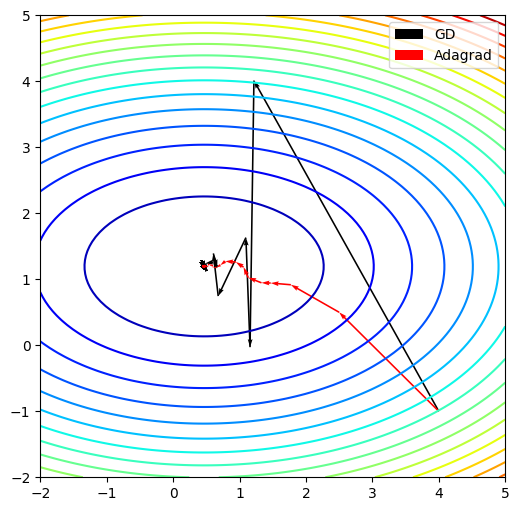

In [41]:
# draw_line

w0 = np.linspace(-2,5,101)
w1 = np.linspace(-2,5,101)
w0, w1 = np.meshgrid(w0, w1)
LOSSW = w0 * 0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i,j],w1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))
ax.contour(w0, w1, LOSSW, cmap=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()),20 ))

paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='k')

paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['GD','Adagrad'])
plt.show()

In [42]:
batch_size = 10
MaxEpochs = 51
#Adagrad vs RMSprop
epsilon = 0.25
delta = 1E-6

rho = 0.9

In [52]:
#RMSprop

w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_rmsprop = []

for epoch in range(MaxEpochs):
    if epoch % 10 ==0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        
        path_rmsprop.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)

        r = rho * r + (1. - rho) * grad * grad
        delw = -epsilon * grad / np.sqrt(delta+r) 
       
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.46456558 1.20512106] 0.006789718705465277
20 [0.43674458 1.21300852] 0.007058189427519757
30 [0.43674954 1.21300674] 0.007058105455299312
40 [0.43674954 1.21300674] 0.007058105454484383
50 [0.43674954 1.21300674] 0.007058105454484373


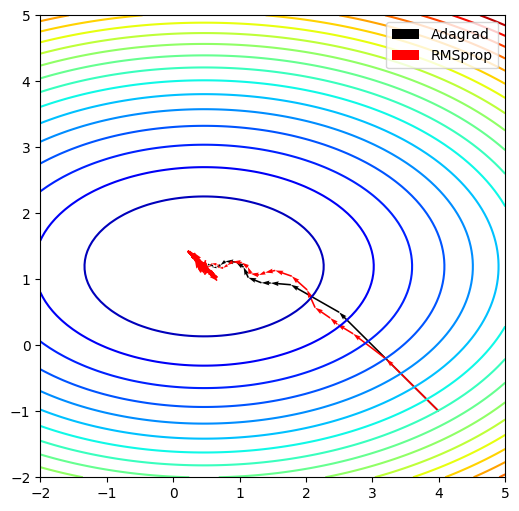

In [47]:
# draw_line

w0 = np.linspace(-2,5,101)
w1 = np.linspace(-2,5,101)
w0, w1 = np.meshgrid(w0, w1)
LOSSW = w0 * 0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i,j],w1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))
ax.contour(w0, w1, LOSSW, cmap=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()),20 ))

paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='k')

paths = path_rmsprop
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='r')


plt.legend(['Adagrad','RMSprop'])
plt.show()

In [51]:
batch_size = 10
MaxEpochs = 51
epsilon = 0.1
delta = 1E-6

# RMSprop vs Adam
rho = 0.9

delta_adam =1E-8
rho1 = 0.9
rho2 = 0.999

In [49]:
# Adam

w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
s = np.zeros_like(w0)
path_adam = []
t=0
for epoch in range(MaxEpochs):
    if epoch % 10 ==0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        
        path_adam.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)

        s = rho1 * s + (1. - rho1) * grad 
        r = rho2 * r + (1. - rho2) * (grad * grad)
        t += 1

        shat = s / (1. - rho1 **t)
        raht = r / (1. - rho2 **t)

        delw = -epsilon * shat / (delta_adam+np.sqrt(raht)) 
       
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.50374253 1.27270463] 0.009991311458367447
20 [0.46748373 1.20122063] 0.00675684656345232
30 [0.46421774 1.1973704 ] 0.006741555264123772
40 [0.46458265 1.19746515] 0.0067414585756450235
50 [0.46452398 1.19749213] 0.006741575079068978


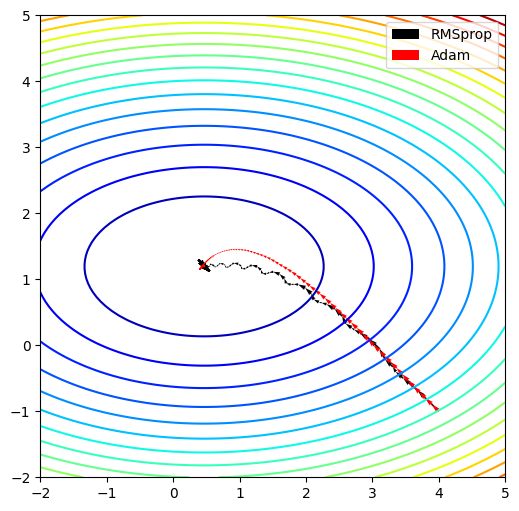

In [53]:
# draw_line

w0 = np.linspace(-2,5,101)
w1 = np.linspace(-2,5,101)
w0, w1 = np.meshgrid(w0, w1)
LOSSW = w0 * 0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i,j],w1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))
ax.contour(w0, w1, LOSSW, cmap=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()),20 ))

paths = path_rmsprop
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='k')

paths = path_adam
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['RMSprop','Adam'])
plt.show()